In [ ]:
'''
In the project it will be useful to have a function to perform 
a sliding window search on an image. This will
just be the first iteration, where you don't actually need to do
anything besides plot a rectangle at each window position.

So, goal here is to write a function that takes in an image, 
start and stop positions in both x and y (imagine a bounding box
for the entire search region), window size (x and y dimensions),
and overlap fraction (also for both x and y). Your function should
return a list of bounding boxes for the search windows, which will
then be passed to draw draw_boxes() function.
'''

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')
print(image.shape)
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        #print(f'bbox[0], bbox[1]')
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

(707, 1259, 3)


In [27]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    
    overlap_proportion_x = xy_overlap[0]
    overlap_proportion_y = xy_overlap[1]
    
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None: x_start_stop[0] = 0 
    if x_start_stop[1] == None:
        x_start_stop[1] = image.shape[1]
    else:
        x_start_stop[1] = min(image.shape[1],x_start_stop[1])
    if y_start_stop[0] == None: y_start_stop[0] = 0 
    if y_start_stop[1] == None: 
        y_start_stop[1] = image.shape[0]
    else:
        y_start_stop[1] = min(image.shape[0],y_start_stop[1]) 
    #print(f'x_start_stop = {x_start_stop}, y_start_stop = {y_start_stop}')
    # Compute the span of the region to be searched
    image_width = x_start_stop[1] - x_start_stop[0]
    image_height = y_start_stop[1] - y_start_stop[0]
    #print(f'image_width = {image_width}, image_height = {image_height}')
    
    # Compute the number of pixels per step in x/y
    window_width = xy_window[0]
    window_height = xy_window[1]
    
    # Compute the number of windows in x/y
    windows_x = 1 + (image_width - window_width)/(window_width * overlap_proportion_x)
    windows_y = 1 + (image_height - window_height)/(window_height * overlap_proportion_y)
    print(f'windows_x = {windows_x}, windows_y = {windows_y}')
    
    # Initialize a list to append window positions to
    window_list = []
    x = x_start_stop[0]
    y = y_start_stop[0]
    # Loop through finding x and y window positions
    #while (y + window_height) < image_height:
    while (y + window_height) <= y_start_stop[1]:
        #while (x + window_width) < image_width:
        while (x + window_width) <= x_start_stop[1]:
        #     Note: you could vectorize this step, but in practice
        #     you'll be considering windows one by one with your
        #     classifier, so looping makes sense
            # Calculate each window position
            bounding_box = ((x,y),(x + window_width,y + window_height))
            print(bounding_box)
            # Append window position to list
            window_list.append(bounding_box)
            x += int(window_width * overlap_proportion_x)
            #if less than window_width space not covered
            if (x + window_width) > (image_width -1) :
            #if (x + window_width) > x_start_stop[1] +1
                bounding_box = (((image_width -1 - window_width),y),((image_width -1),y + window_height))
                # Append window position to list
                window_list.append(bounding_box)
                #x = image_width -1 - window_width
        # end while() on x
        # now should increment y AND reset x
        x = x_start_stop[0]
        y += int(window_height * overlap_proportion_y)
        #if less than window_height space not covered
        #if (y + window_height) > (image_height -1) and y != y_start_stop[1] - int(window_height * overlap_proportion_y):
        #    y = image_height -1 - window_height        
    # end while() on y  
    # Return the list of windows
    return window_list

windows_x = 18.671875, windows_y = 10.046875
((0, 0), (128, 128))
((64, 0), (192, 128))
((128, 0), (256, 128))
((192, 0), (320, 128))
((256, 0), (384, 128))
((320, 0), (448, 128))
((384, 0), (512, 128))
((448, 0), (576, 128))
((512, 0), (640, 128))
((576, 0), (704, 128))
((640, 0), (768, 128))
((704, 0), (832, 128))
((768, 0), (896, 128))
((832, 0), (960, 128))
((896, 0), (1024, 128))
((960, 0), (1088, 128))
((1024, 0), (1152, 128))
((1088, 0), (1216, 128))
((0, 64), (128, 192))
((64, 64), (192, 192))
((128, 64), (256, 192))
((192, 64), (320, 192))
((256, 64), (384, 192))
((320, 64), (448, 192))
((384, 64), (512, 192))
((448, 64), (576, 192))
((512, 64), (640, 192))
((576, 64), (704, 192))
((640, 64), (768, 192))
((704, 64), (832, 192))
((768, 64), (896, 192))
((832, 64), (960, 192))
((896, 64), (1024, 192))
((960, 64), (1088, 192))
((1024, 64), (1152, 192))
((1088, 64), (1216, 192))
((0, 128), (128, 256))
((64, 128), (192, 256))
((128, 128), (256, 256))
((192, 128), (320, 256))
((256,

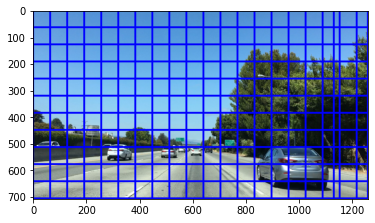

In [28]:
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)